<a href="https://colab.research.google.com/github/sumitgaurav25/python---practice/blob/main/12KMeansExerciseipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667
...,...,...,...,...
145,6.7,3.0,0.711864,0.916667
146,6.3,2.5,0.677966,0.750000
147,6.5,3.0,0.711864,0.791667
148,6.2,3.4,0.745763,0.916667


In [13]:
from sklearn.cluster import KMeans

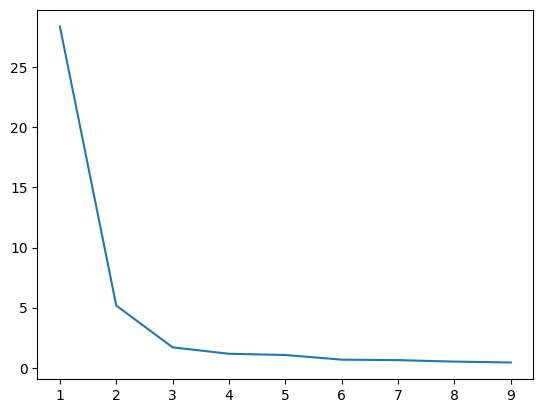

In [15]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df[['petal length (cm)', 'petal width (cm)']])
  km.inertia_
  sse.append(km.inertia_)

plt.plot(k_rng, sse)

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1


Text(0, 0.5, 'petal width (cm)')

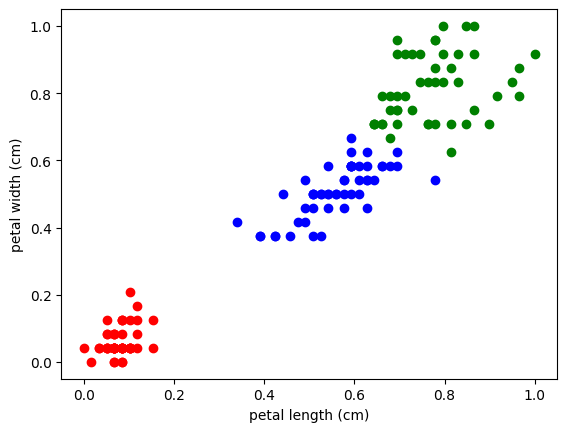

In [18]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'r')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'b')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')